<a href="https://colab.research.google.com/github/saiKelkar/Fast.ai/blob/main/01_music_instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.5 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keyword, max_images=200): return L(DDGS().images(keyword, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('guitar photos', max_images=1)
urls[0]

'https://getwallpapers.com/wallpaper/full/a/c/c/827157-beautiful-guitar-hero-wallpapers-2048x2048.jpg'

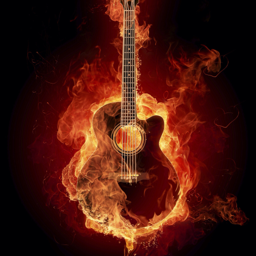

In [5]:
from fastdownload import download_url
dest = 'guitar.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

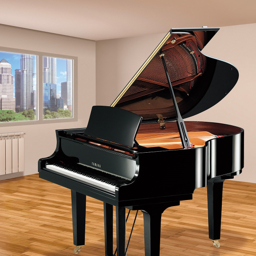

In [6]:
download_url(search_images('piano photos', max_images=1)[0], 'piano.jpg', show_progress=False)
Image.open('piano.jpg').to_thumb(256, 256)

In [11]:
searches = 'guitar', 'piano', 'drums'
path = Path('guitar_or_not')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photos', max_images=100))
  sleep(50)
  download_images(dest, urls=search_images(f'{o} flaming', max_images=100))
  sleep(50)
  download_images(dest, urls=search_images(f'{o} rock', max_images=100))
  sleep(50)
  resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA imag

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


79

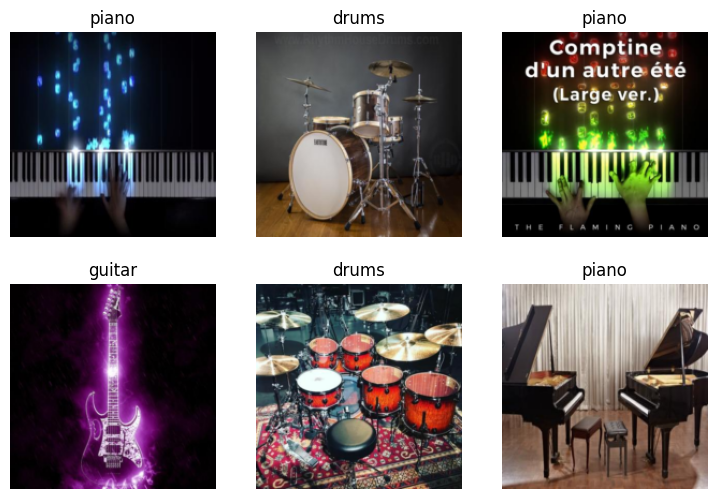

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 64.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.900005,0.213251,0.055034,07:21


epoch,train_loss,valid_loss,error_rate,time
0,0.238529,0.135611,0.037584,10:33
1,0.118607,0.132906,0.032215,10:01
2,0.065521,0.128681,0.032215,10:00


In [18]:
is_guitar,_,probs = learn.predict(PILImage.create('guitar.jpg'))
print(f"This is a: {is_guitar}.")
print(f"Probability it's a guitar: {probs[1]:.4f}")

This is a: guitar.
Probability it's a guitar: 1.0000
